In [1]:
!pip install nltk wordcloud matplotlib

In [2]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Sentiment Scores: {'neg': 0.048, 'neu': 0.782, 'pos': 0.169, 'compound': 0.9952}
Overall Sentiment: Positive


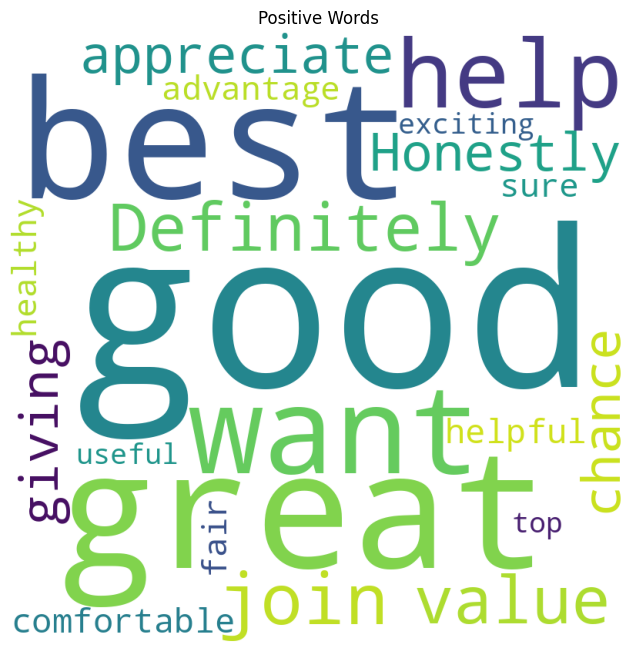

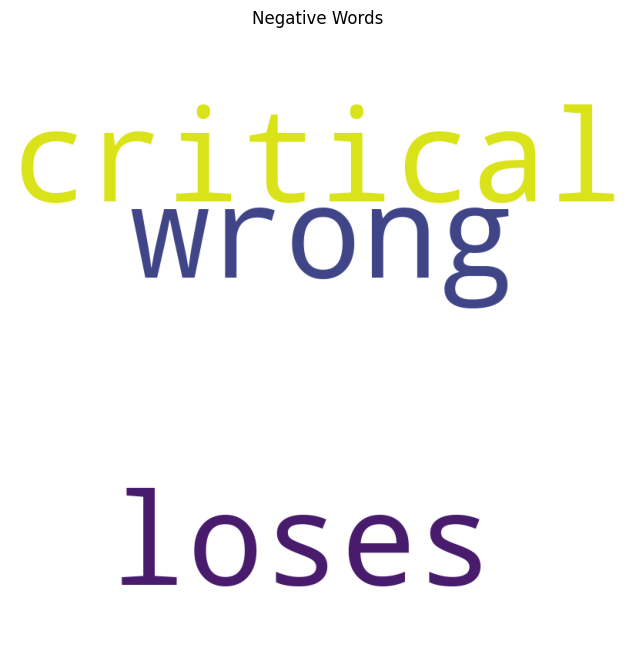

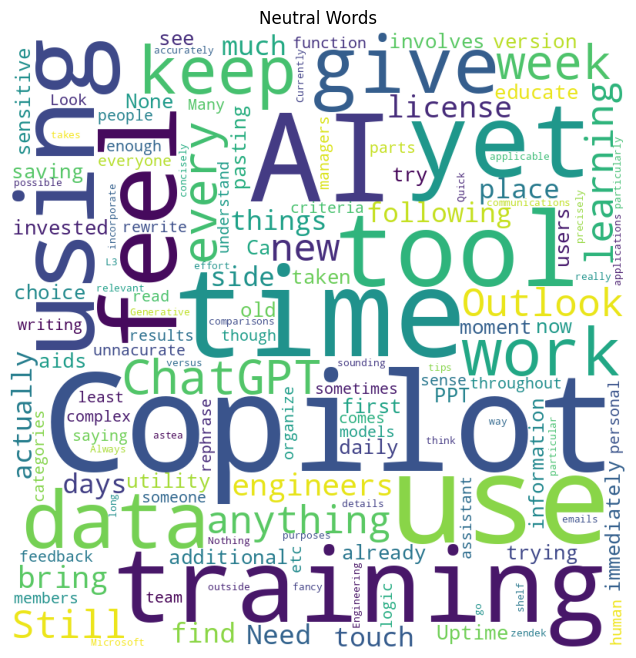

In [4]:
# Function to analyze sentiment of a given text
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)

    # Determine overall sentiment based on compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        overall_sentiment = 'Positive'
    elif compound_score <= -0.05:
        overall_sentiment = 'Negative'
    else:
        overall_sentiment = 'Neutral'

    return sentiment_scores, overall_sentiment

# Sample text (replace with your transcription if needed)
text = """I'd like to keep using it, and join any additional trainings (I've already taken the Uptime training) to see how best to use the AI. For now, I'll keep trying. None at the moment. It's a good utility to have and aids me on my daily work. Definitely has good value. I appreciate that PPT invested to try this tool immediately and educate all users. Honestly, I use ChatGPT more; Copilot is just not there yet. I'm giving Copilot a chance every week, and it is my first choice for anything that involves sensitive information or anything I do not feel comfortable pasting into ChatGPT. Can't use with old version of Outlook. Do not like the new Outlook. Still learning, but great tool and is helpful with saving time throughout the week. Give everyone -- at least all the managers and engineers -- a license! Not all of my team members -- all great engineers -- have a license. I feel like it gives me an advantage over them -- which I don't want and isn't fair to them. Still learning what it can do. Not sure on the feedback just yet. The function is good, though sometimes can bring unnacurate data when logic is not that complex (f.e, organize the following data in categories by using the following criteria +2 days = healthy, +5 days, critical etc) Many times brings wrong results. There is a personal touch that comes with writing things yourself that people can sense. Using AI to rewrite or rephrase things loses that human touch. It feels like more bloat/fluff to read through to actually understand what someone is saying. It has its place at times, but its not good enough assistant in what actually needs help yet. Look up parts, models, give me side by side comparisons with as much details of each as possible for substitute/sparing purposes. Need an AI that can find precisely relevant data, concisely, and accurately every time. Generative AI is not really applicable for L3 Engineering outside of fancy sounding emails. It would be best if we could incorporate copilot into other applications like zendek and astea. Nothing particular. Always exciting when I find out a new place I can use some of these tools. Quick tips for where Copilot can help. I think Microsoft has a long way to go until Copilot is particularly useful.  Currently it takes me much more effort to get it to do what I want versus just doing the work myself. Training and communications have been top shelf."""

# Analyze the sentiment of the text
sentiment_scores, overall_sentiment = analyze_sentiment(text)

# Print the sentiment scores and overall sentiment
print(f"Sentiment Scores: {sentiment_scores}")
print(f"Overall Sentiment: {overall_sentiment}")

# Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Tokenize the text into words
words = word_tokenize(text)

# Initialize lists to store categorized words
positive_words = []
negative_words = []
neutral_words = []

# Categorize each word based on sentiment
for word in words:
    if word.isalnum():  # Ignore punctuation
        sentiment = sid.polarity_scores(word)
        if sentiment['compound'] >= 0.05:
            positive_words.append(word)
        elif sentiment['compound'] <= -0.05:
            negative_words.append(word)
        else:
            neutral_words.append(word)

# Function to generate word clouds
def generate_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(" ".join(words))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for positive, negative, and neutral words
generate_word_cloud(positive_words, 'Positive Words')
generate_word_cloud(negative_words, 'Negative Words')
generate_word_cloud(neutral_words, 'Neutral Words')